In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Estudos/Alura/Classifica%C3%A7%C3%A3o/3.classificacao-multiclasse/dados_estudantes.csv")

In [3]:
df.head(5)

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado


### Exploração de Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [5]:
df['Target'].unique()

array(['Desistente', 'Graduado', 'Matriculado'], dtype=object)

In [6]:
df.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


In [7]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',  'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']
df[colunas_categoricas].describe()

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


In [8]:
df['Estado civil'].value_counts(normalize=True)*100

,proportion
Estado civil,
Solteiro,88.584991
Casado,8.566908
Divorciado,2.056962
União Estável,0.565099
Legalmente Separado,0.135624
Viúvo,0.090416


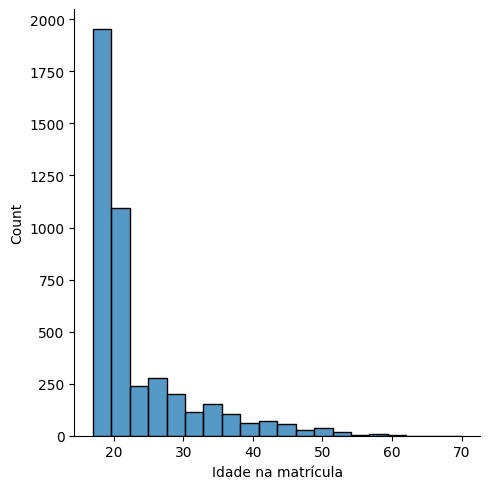

In [9]:
sns.displot(df['Idade na matrícula'], bins=20)
plt.show()

In [10]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))

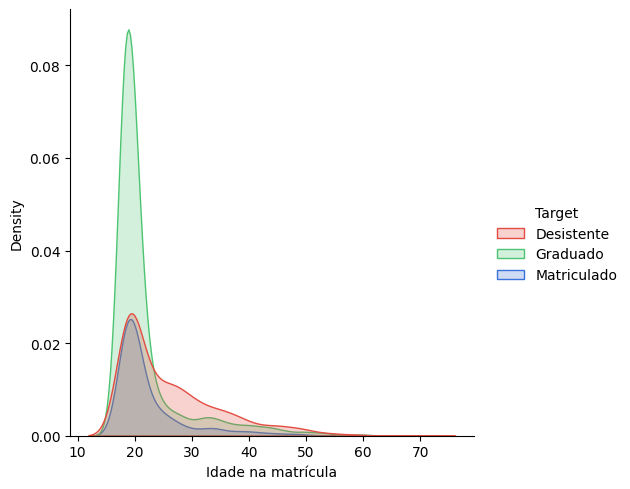

In [11]:
sns.displot(data=df, x='Idade na matrícula', hue='Target', kind='kde', fill=True)
plt.show()

In [12]:
df['Estrangeiro'].value_counts(normalize=True)*100

,proportion
Estrangeiro,
Não,97.513562
Sim,2.486438


In [13]:
df['Sexo'].value_counts(normalize=True)*100

,proportion
Sexo,
Feminino,64.82821
Masculino,35.17179


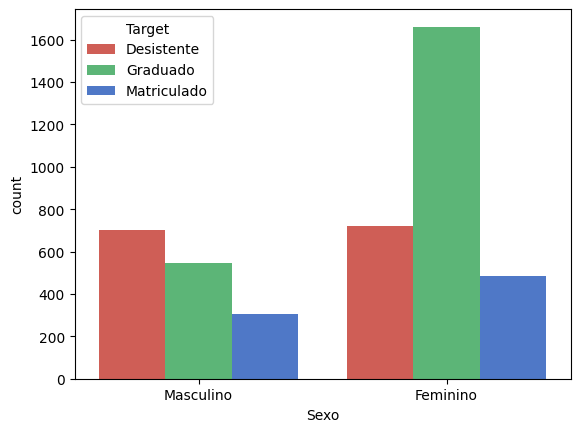

In [14]:
sns.countplot(x='Sexo', hue='Target', data=df)
plt.show()

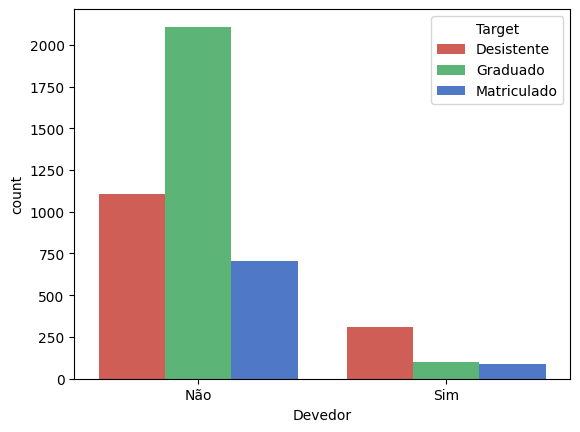

In [15]:
sns.countplot(x='Devedor', hue='Target', data=df)
plt.show()
# Não ter recursos financeiros pode ser um sinal de desistência, já que entre os
# que devem a barra de desistência é maior.

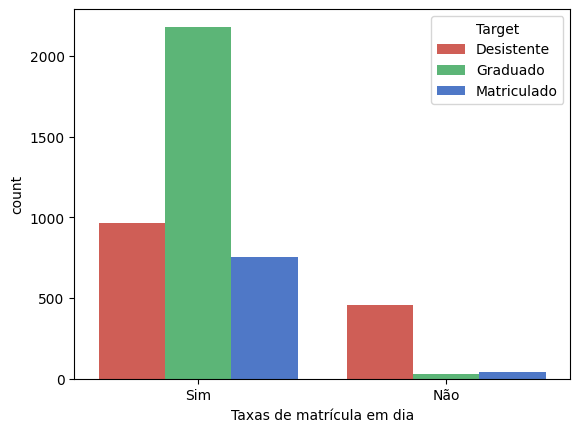

In [16]:
sns.countplot(x='Taxas de matrícula em dia', hue='Target', data=df)
plt.show()

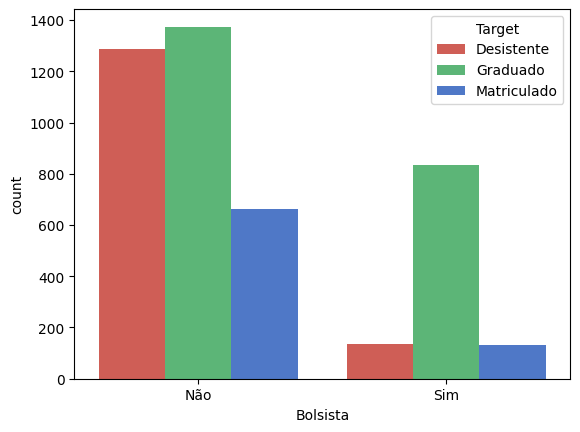

In [17]:
sns.countplot(x='Bolsista', hue='Target', data=df)
plt.show()
# Bolsistas tendem a não desistir do curso.

In [18]:
contagem = df.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')

contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x/x.sum())*100)

fig = px.bar(contagem, y='Curso', x='Porcentagem', color='Target', orientation='h',
             color_discrete_map=color_dict)
fig.show()

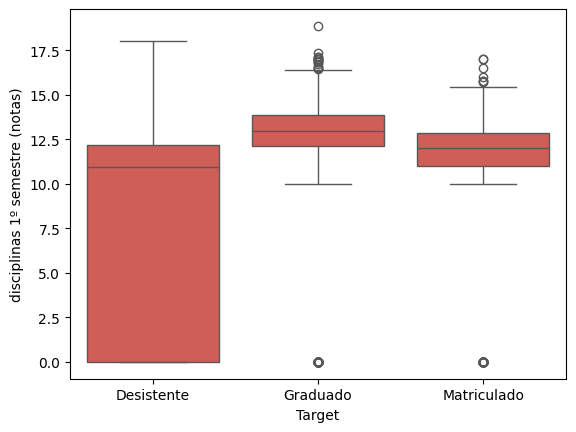

In [19]:
sns.boxplot(x='Target', y='disciplinas 1º semestre (notas)', data=df)
plt.show()

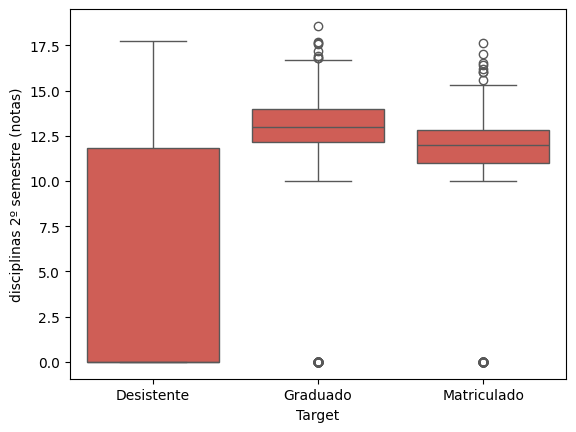

In [20]:
sns.boxplot(x='Target', y='disciplinas 2º semestre (notas)', data=df)
plt.show()

In [21]:
df['Target'].value_counts(normalize=True)*100

,proportion
Target,
Graduado,49.932188
Desistente,32.120253
Matriculado,17.947559


### Tratamento de Dados

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
colunas_categoricas = ['Migração', 'Sexo','Estrangeiro', 'Necessidades educacionais especiais', 'Devedor',
                     'Taxas de matrícula em dia', 'Bolsista', 'Período','Estado civil', 'Curso', 'Qualificação prévia']

In [24]:
encoder = OneHotEncoder(drop='if_binary')

df_categorico = df[colunas_categoricas]

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorico).toarray(),
                          columns=encoder.get_feature_names_out(colunas_categoricas))
df_final = pd.concat([df.drop(colunas_categoricas, axis=1), df_encoded],
                     axis=1)

In [25]:
df_final

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para regressão logística e linear é importante normalizar os dados. Para Árvore de Decisão a normalização não é necessária.

Separação de dados

In [26]:
X = df_final.drop('Target', axis=1)
y = df_final['Target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X, X_teste, y, y_teste = train_test_split(X, y, test_size=0.15, stratify=y, random_state=0)
X_treino, X_val, y_treino, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

Modelo Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_treino, y_treino)
y_pred = rf.predict(X_val)
print(f'Acurácia de treino: {rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {rf.score(X_val, y_val)}')

Acurácia de treino: 0.9975177304964539
Acurácia de validação: 0.7680851063829788


Overfitting aos dados de treino e não trabalha nos dados de validação.

In [31]:
rf = RandomForestClassifier(random_state=0, max_depth=10)
rf.fit(X_treino, y_treino)
y_pred = rf.predict(X_val)
print(f'Acurácia de treino: {rf.score(X_treino, y_treino)}')
print(f'Acurácia de validação: {rf.score(X_val, y_val)}')

Acurácia de treino: 0.898936170212766
Acurácia de validação: 0.7734042553191489


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
matriz_confusao = confusion_matrix(y_val, y_pred)

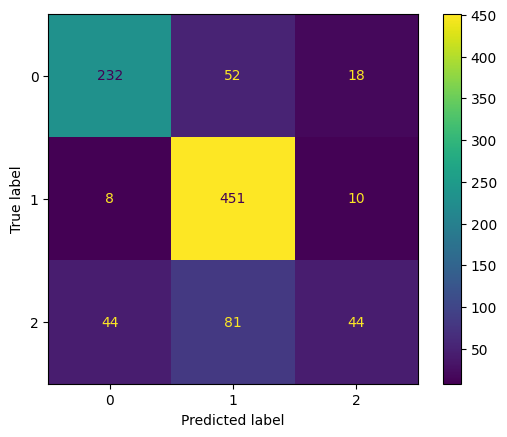

In [34]:
viz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
viz.plot();

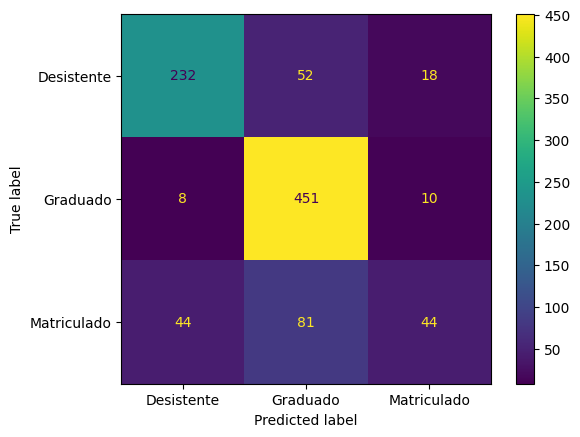

In [35]:
viz = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=rf.classes_)
viz.plot();

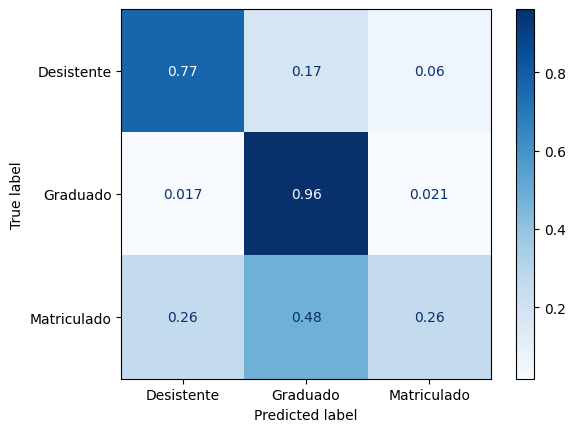

In [36]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

In [37]:
from sklearn.metrics import classification_report

In [38]:
report = classification_report(y_val, y_pred)
print('Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

  Desistente       0.82      0.77      0.79       302
    Graduado       0.77      0.96      0.86       469
 Matriculado       0.61      0.26      0.37       169

    accuracy                           0.77       940
   macro avg       0.73      0.66      0.67       940
weighted avg       0.76      0.77      0.75       940



Problema de desbalanceamento para a classe de Matriculados

Balanceando os dados com Superamostragem.

In [39]:
y_treino.value_counts()

,count
Target,
Graduado,1408
Desistente,906
Matriculado,506


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X_treino, y_treino)

In [42]:
y_balanceado.value_counts()

,count
Target,
Desistente,1408
Graduado,1408
Matriculado,1408


In [43]:
modelo = RandomForestClassifier(random_state=0, max_depth=10)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_val)

              precision    recall  f1-score   support

  Desistente       0.85      0.72      0.78       302
    Graduado       0.81      0.87      0.84       469
 Matriculado       0.48      0.52      0.50       169

    accuracy                           0.76       940
   macro avg       0.72      0.70      0.71       940
weighted avg       0.77      0.76      0.76       940



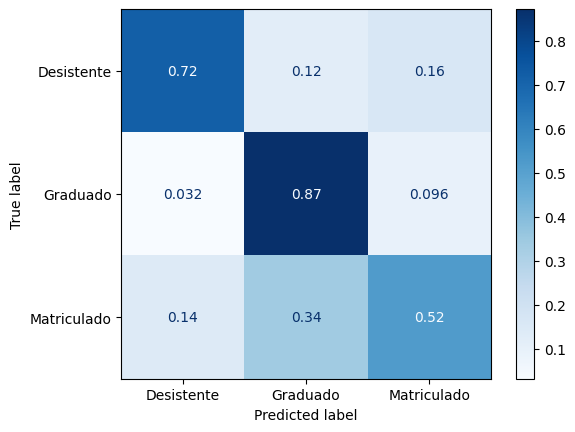

In [44]:
print(classification_report(y_val, y_pred))
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, normalize='true', cmap='Blues');

Pipeline para validação

In [45]:
from imblearn.pipeline import Pipeline as imbpipeline

In [46]:
modelo = RandomForestClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()),
                        ('floresta', modelo)])

In [47]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [48]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall_weighted')
cv_resultados['test_score']

array([0.76994681, 0.74202128, 0.75797872, 0.7712766 , 0.76196809])

In [50]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2* desvio_padrao}, {min(media + 2 * desvio_padrao, 1.0)}]')

Intervalo de confiança: [0.7395621140891926, 0.7817144816554884]


Testando o modelo com dados não vistos

              precision    recall  f1-score   support

  Desistente       0.88      0.75      0.81       213
    Graduado       0.82      0.85      0.84       332
 Matriculado       0.50      0.59      0.54       119

    accuracy                           0.77       664
   macro avg       0.73      0.73      0.73       664
weighted avg       0.78      0.77      0.77       664



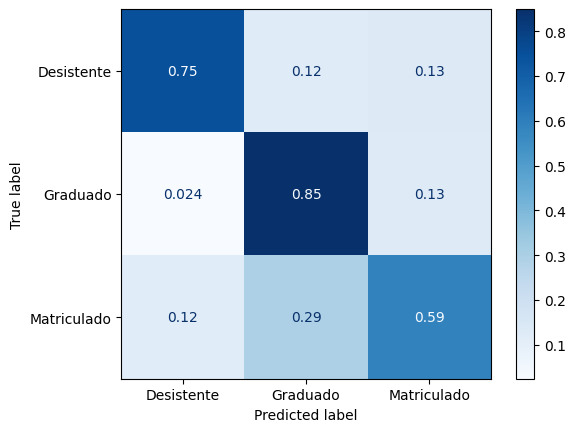

In [51]:
oversample = SMOTE(random_state=0)
X_balanceado, y_balanceado = oversample.fit_resample(X, y)
modelo = RandomForestClassifier(max_depth=10, random_state=0)
modelo.fit(X_balanceado, y_balanceado)
y_pred = modelo.predict(X_teste)

print(classification_report(y_teste, y_pred))
ConfusionMatrixDisplay.from_predictions(y_teste, y_pred, normalize='true', cmap='Blues');